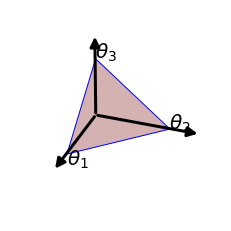

In [3]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

import scipy.spatial
import matplotlib.tri as mtri
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# This class comes from http://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs)


x = [1, 0, 0]
y = [0, 1, 0]
z = [0, 0, 1]

pts = np.vstack([x, y]).T
tess = scipy.spatial.Delaunay(pts)

tri = tess.vertices
triang = mtri.Triangulation(x=pts[:, 0], y=pts[:, 1], triangles=tri)

fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = plt.axes(projection="3d")
ax.plot_trisurf(triang, z, alpha=0.3, color="red", edgecolors="blue")
ax.set_axis_off()

for i in range(3):
    EndPs = [[0, 0], [0, 0], [0, 0]]
    EndPs[i][1] = 1.4
    art = Arrow3D(EndPs[0], EndPs[1], EndPs[2], mutation_scale=20, lw=3, arrowstyle="-|>", color="black")
    ax.add_artist(art)
    theta = "$\theta_" + str(i) + "$"
    EndPs = [[0, 0], [0, 0], [0, 0]]
    if i == 0:
        EndPs[i][1] = 1
        EndPs[2][1] = -0.2
    else:
        EndPs[i][1] = 1
    ax.text(EndPs[0][1], EndPs[1][1], EndPs[2][1], r"$\theta_%s$" % (i + 1), size=20)

ax.view_init(elev=30, azim=20)
ax.dist = 15
# plt.draw()
# plt.tight_layout()
plt.show()

# pml.savefig("dirichletSimplex.pdf")